# NETFLIX DATA ANALYSIS

In an era where streaming platforms have become an integral part of our entertainment landscape, understanding content trends and performance metrics is crucial for content creators and platform providers. With million subscribers worldwide, Netflix stands out as one of the leading players in the streaming industry. This raw data contains Unlabelled text data of around 9000 Netflix Shows and Movies along with Full details like Cast, Release Year, Rating, Description, etc.

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset

df=pd.read_csv("netflix_titles.csv") 

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
#finding rows and columns

df.shape

(8807, 12)

There are 8807 rows and 12 columns.

In [114]:
#to show no. of elemnents in the dataset

df.size

104424

In [4]:
#shows the counts and datatypes of our variables

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
#converting the data type of date_added into datetime

df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce', infer_datetime_format=True)
df.head(3)

C:\Users\Monsoon\AppData\Local\Temp\ipykernel_2400\3360245722.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce', infer_datetime_format=True)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [6]:
#finding the duplicate record

df[df.duplicated(keep=False)] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [7]:
#finding the missing values

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

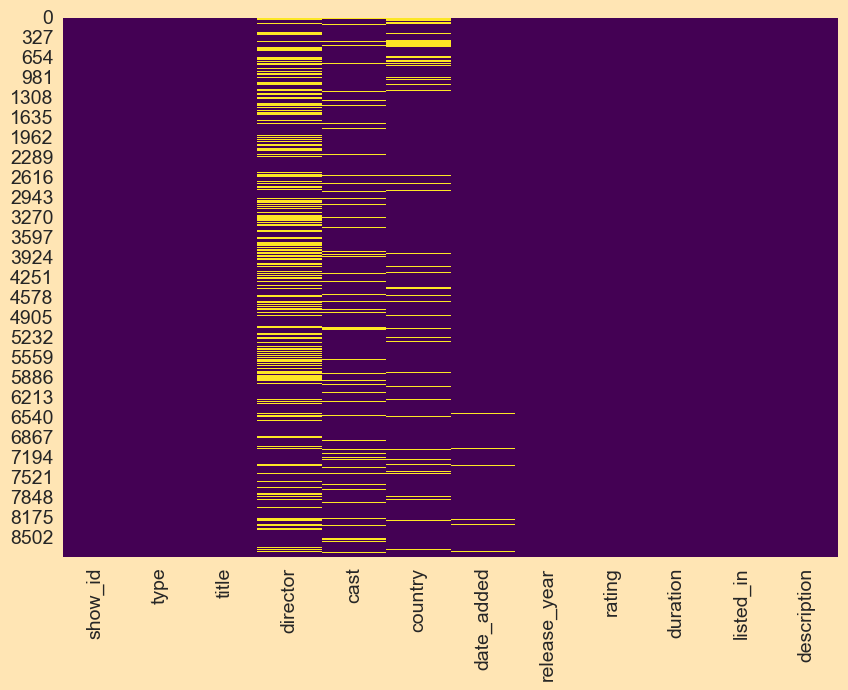

In [11]:
#showing the null values with heatmap

sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()

From the heatmap, we can see that the columns which have missing values are director, cast, country, date_added, rating and duration.

In [8]:
#Handling the missing values
df["director"].fillna("not specified", inplace=True)
df["cast"].fillna("not specified", inplace=True)
df["country"].fillna("not specified", inplace=True)

In [109]:
df.dropna(inplace=True)

In [110]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [58]:
df.shape

(8807, 12)

# EDA:

In [9]:
#use of rcParams to customize the plots.

sns.set_style("darkgrid")
plt.rcParams["font.size"]=14
plt.rcParams["figure.figsize"]=(10,7)
plt.rcParams["figure.facecolor"]="#FFE5B4"    

# 1) Type of content types(Movies & TV Shows) mostly released.

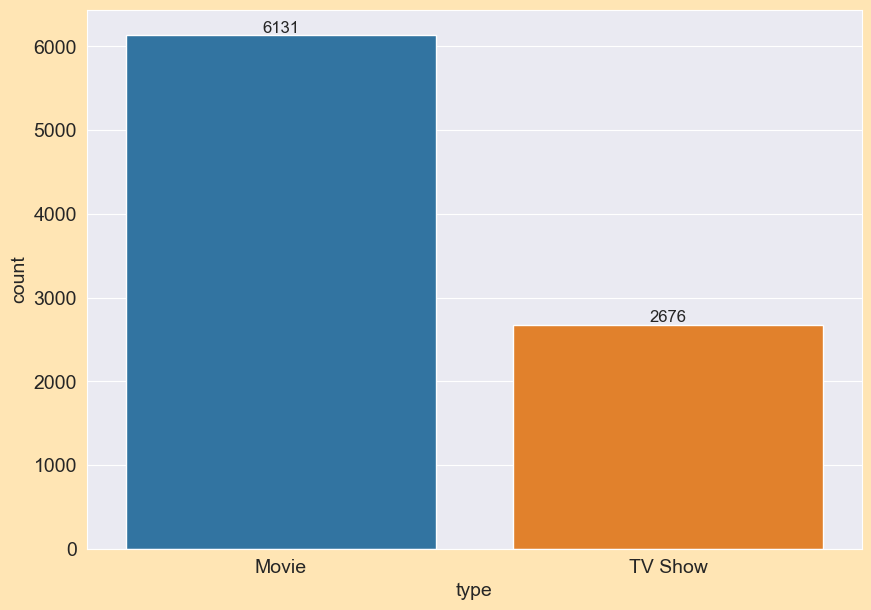

In [18]:
ax=sns.countplot(x="type", data=df)
sns.set(rc={"figure.figsize": (4, 4)})
for bars in ax.containers:
    ax.bar_label(bars)

From the above graph, we can see that movie type of content is released more than TV Show type of content.

# 2) Most number of contents released in years

In [51]:
#counting the number of contents are released in a particular year.

df["release_year"].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

Text(0.5, 1.0, 'Most number of contents released in years')

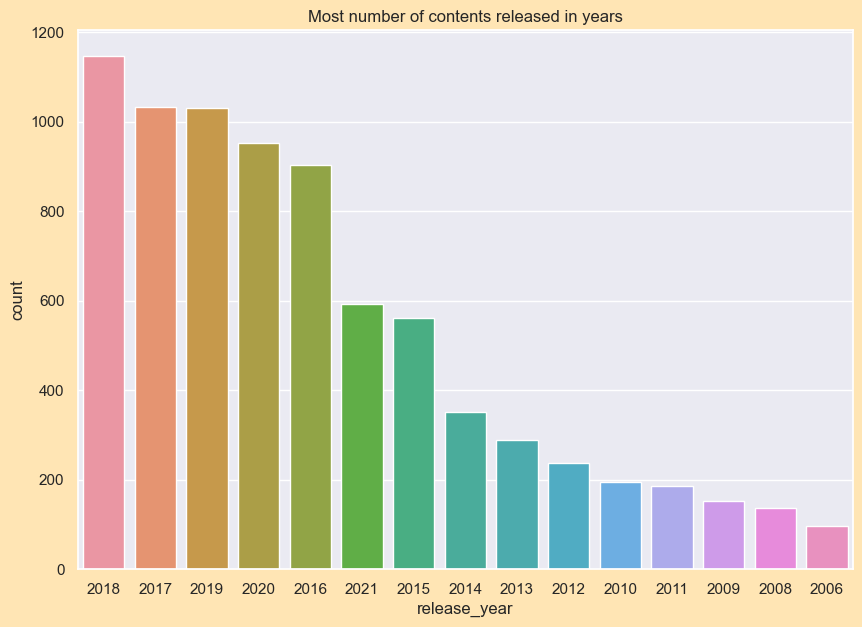

In [56]:
sns.countplot(x="release_year", order=df["release_year"].value_counts().index[0:15],data=df)
plt.title("Most number of contents released in years")

From the above graph, we can see that maximum number of contents released in 2018.

# 3) Maximum type of contents mostly released in years

In [119]:
## Creating  DataFrames 'type_movies' and 'type_tv_shows' by
#filtering rows where the 'type' column is equal to "Movie" and "TV Show".

type_movies=df[df["type"]=="Movie"]
type_tv_shows=df[df["type"]=="TV Show"]

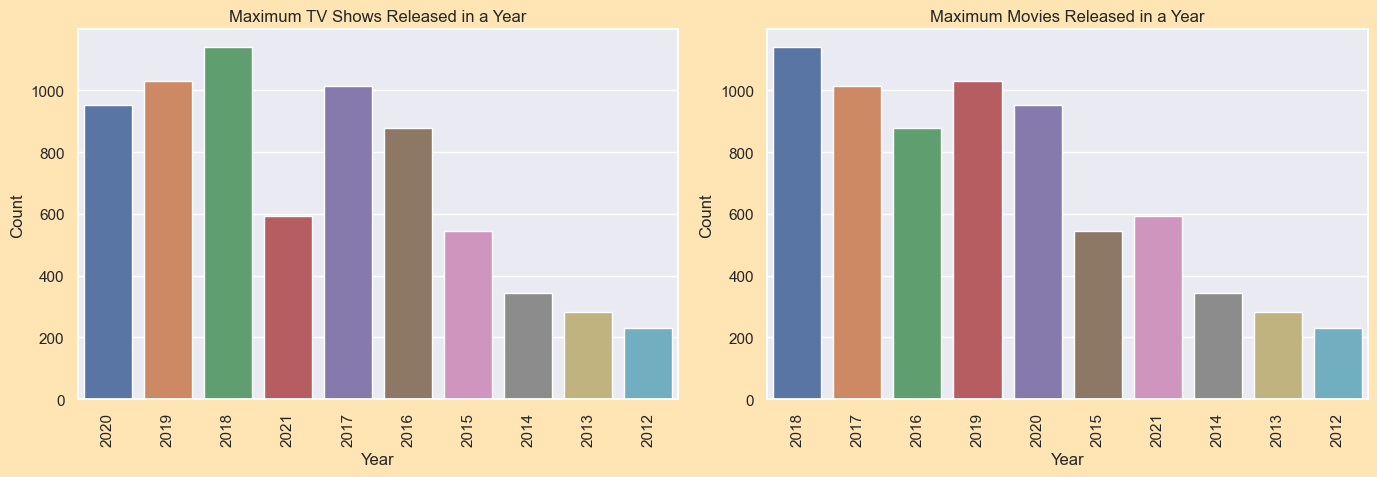

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(x="release_year", data=df, order=type_tv_shows["release_year"].value_counts().iloc[:10].index, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Maximum TV Shows Released in a Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Count")

sns.countplot(x="release_year", data=df, order=type_movies["release_year"].value_counts().iloc[:10].index, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title("Maximum Movies Released in a Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()


From the above we can see that both movies and tv shows are mostly released in 2018.

# 4) Countries with maximum number of contents released

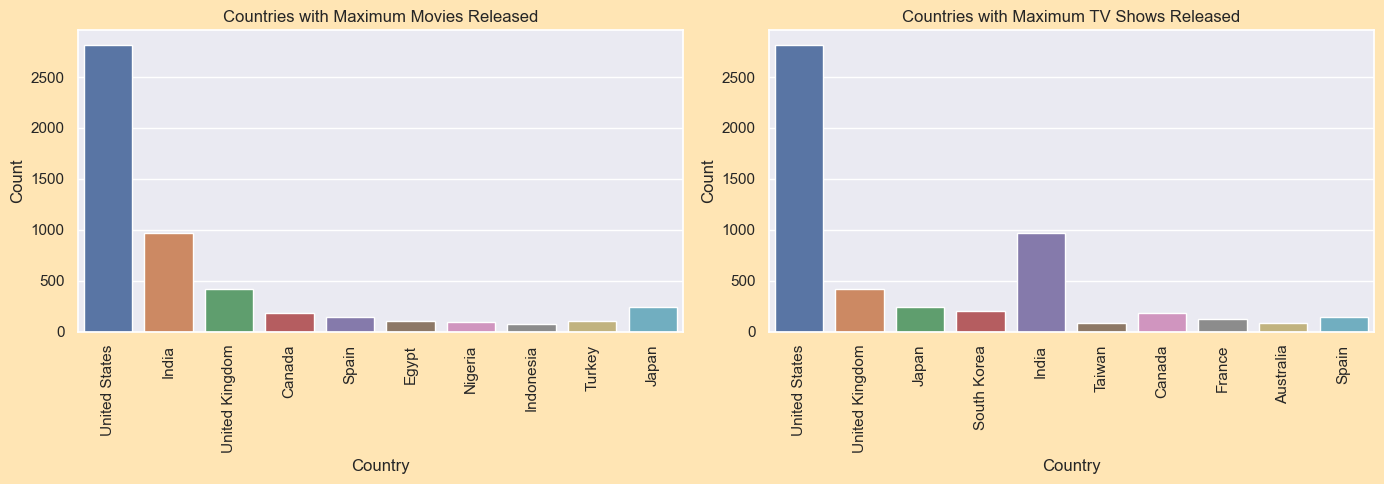

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(x="country", data=df, order=type_movies["country"].value_counts().iloc[:10].index, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Countries with Maximum Movies Released")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Count")

sns.countplot(x="country", data=df, order=type_tv_shows["country"].value_counts().iloc[:10].index, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title("Countries with Maximum TV Shows Released")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()


From the above, we can see that maximum contents released in United States, India and United Kingdom.

# 5) Top 10 Directors

In [6]:
df["director"].value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

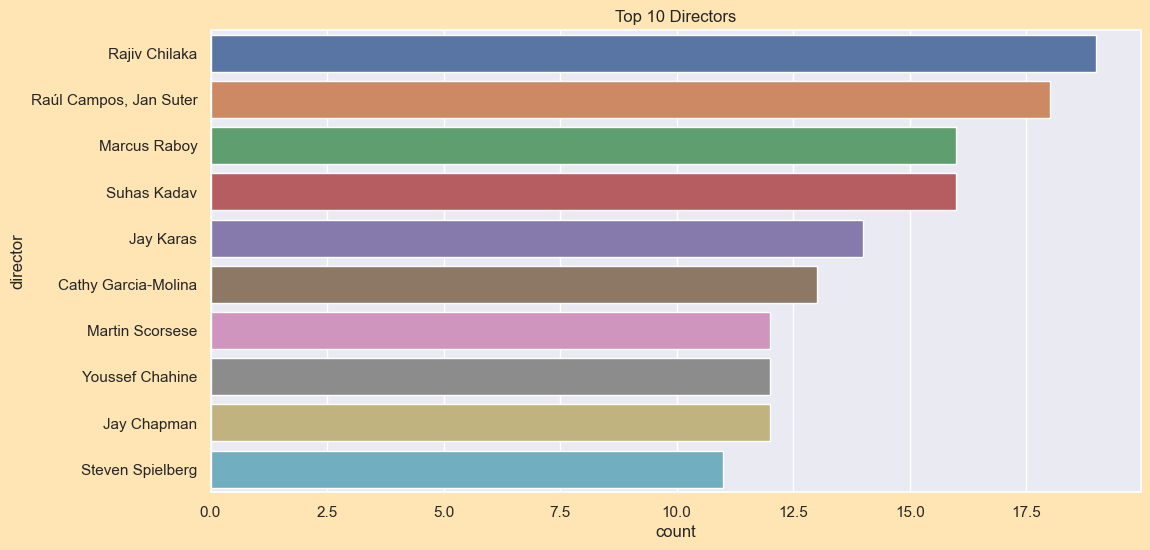

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(y="director", order=df["director"].value_counts().index[0:10], data=df)
plt.title("Top 10 Directors")
plt.show()

From the above, we can see that the top director is Rajiv Chilaka.

# 6) Top 10 Contents Ratings

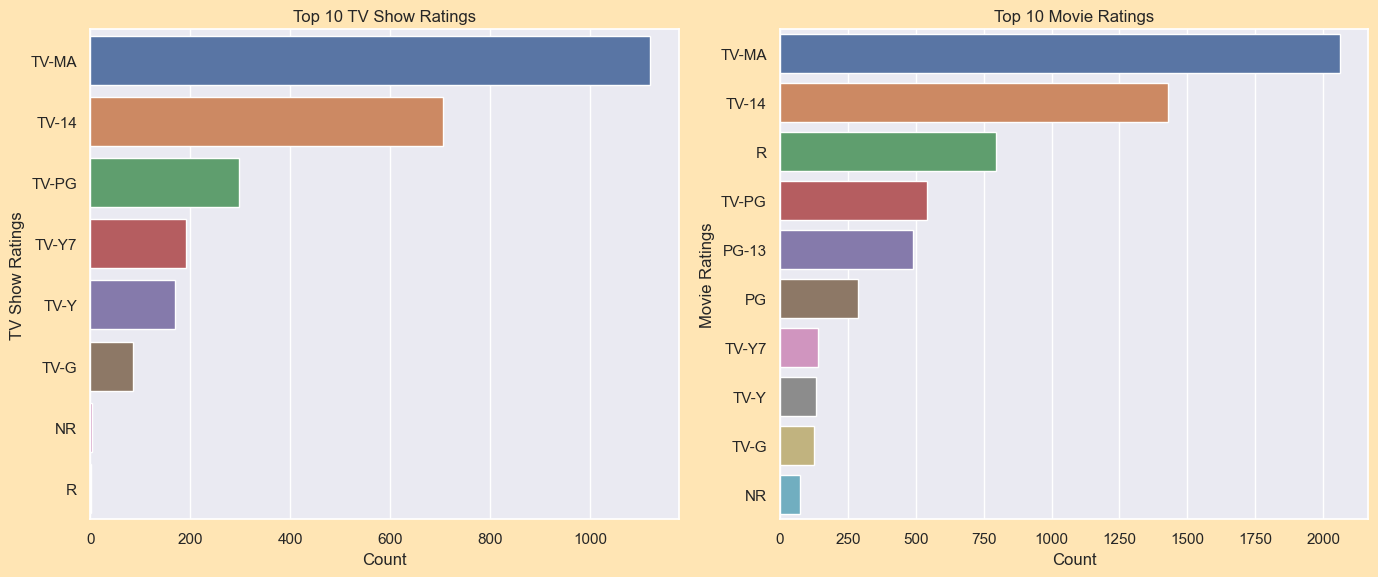

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(y="rating", order=type_tv_shows["rating"].value_counts().index[0:10], data=type_tv_shows, ax=axes[0])
axes[0].set_xlabel('Count')
axes[0].set_ylabel('TV Show Ratings')
axes[0].set_title('Top 10 TV Show Ratings')

sns.countplot(y="rating", order=type_movies["rating"].value_counts().index[0:10], data=type_movies, ax=axes[1])
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Movie Ratings')
axes[1].set_title('Top 10 Movie Ratings')
plt.tight_layout()
plt.show()


From the above we can see that for tv shows, the top ratings are TV-MA, TV-14 and TV-PG.
And for movies, the top ratings are TV-MA, TV-14 and R.
"MA" stands for Mature Audiences. 
And TV-MA rating is top for both type of contents. So, below 18 years of age should not watch.
Second rating for the contents is TV-14 that the contents are mainly for over 14 years of age. Below 14 age of children is not recommended to watch without parental guidance.
Third rating for movies is R which means restricted movies and it is highly prohibited for under 18 years of age.


# 7) Top 10 Genres on Netflix

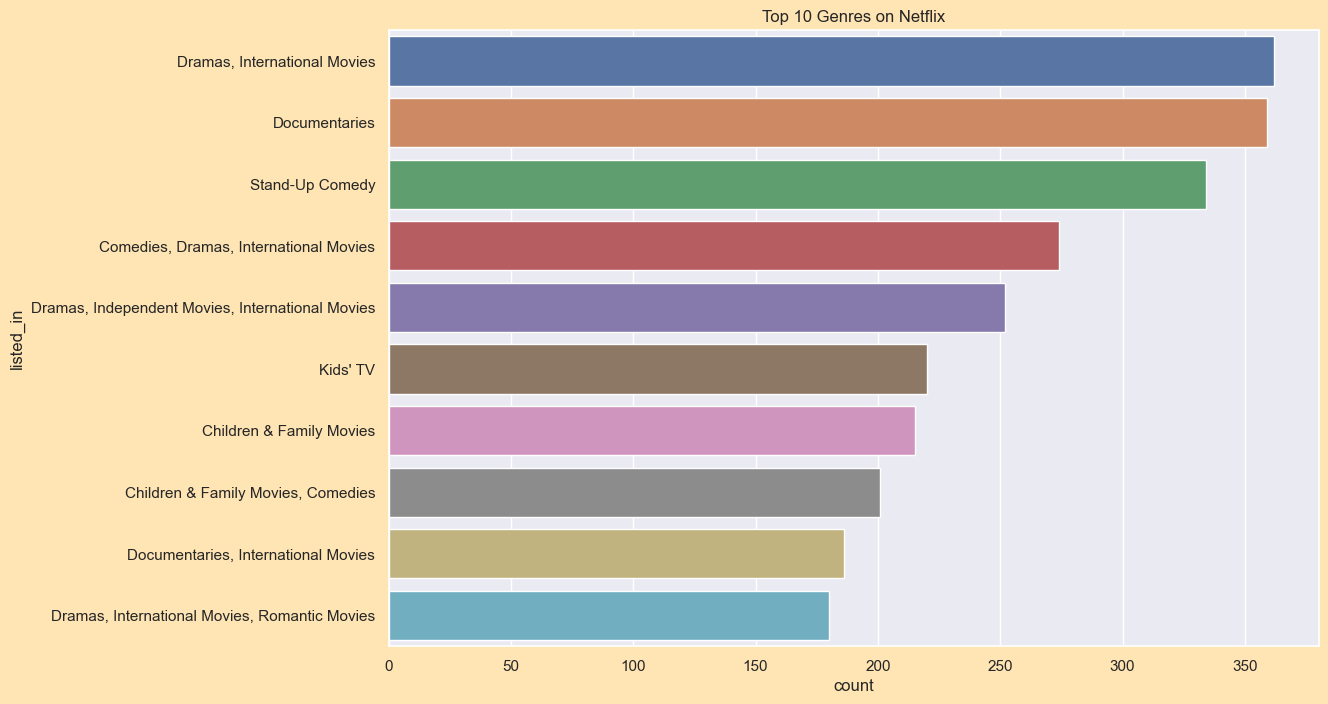

In [78]:
plt.figure(figsize=(12,8))
sns.countplot(y="listed_in", order=df["listed_in"].value_counts().index[0:10], data=df)
plt.title("Top 10 Genres on Netflix")
plt.show()

From the above we can see that the top genre on netflix is Dramas, International Movies.

# 8) Most popular contents' genre

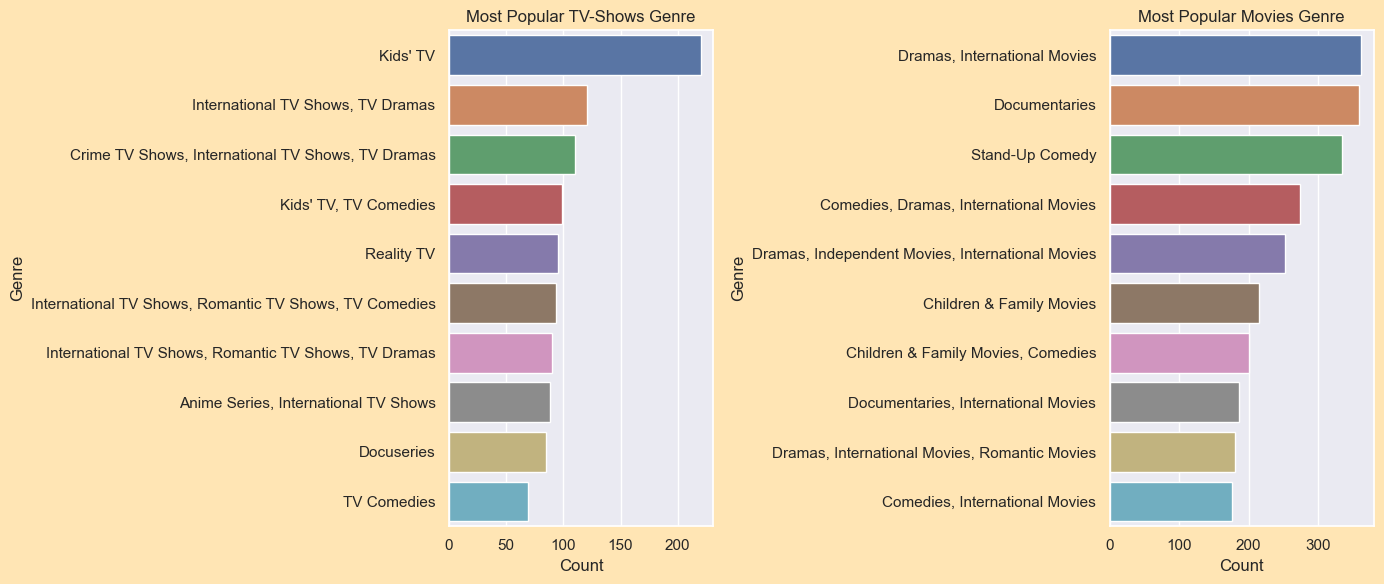

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(y="listed_in", order=type_tv_shows["listed_in"].value_counts().index[0:10], data=type_tv_shows, ax=axes[0])
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Genre')
axes[0].set_title('Most Popular TV-Shows Genre')

sns.countplot(y="listed_in", order=type_movies["listed_in"].value_counts().index[0:10], data=type_movies, ax=axes[1])
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Genre')
axes[1].set_title("Most Popular Movies Genre")
plt.tight_layout()
plt.show()


From the above we can see for TV Shows, the most popular genre is Kids' TV. But for Movies, the mostIn popular genre are Dramas and International Movies.

# 9) Maximum and minumum duration of Movies

In [8]:
#creating the two different columns from duration column using str.split

df[["Minutes", "Unit"]]=df["duration"].str.split(" ", expand=True)

In [9]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,Unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
 12  Minutes       8804 non-null   object
 13  Unit          8804 non-null   object
dtypes: int64(1), object(13)
memory usage: 963.4+ KB


In [11]:
# Convert the 'Minutes' column to numeric, and set errors to 'coerce'

df['Minutes'] = pd.to_numeric(df['Minutes'], errors='coerce')
df["Minutes"].max()

312.0

In [33]:
df["Minutes"].min()

1.0

In [12]:
df[(df["type"]=="Movie") & (df["Minutes"]==312)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Minutes,Unit
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312.0,min


From the above we can see that the maximum duration of movie is 312 minute and the minimum duration is 1 minute.
And the name of the 312 minute duration movie is Black Mirror Bandernatch.

# Conclusion:

The following is the summary of insights we found:

1) More number of movies are released as compared to TV Shows in Netflix.
2) In 2018, maximum number of contents released.
3) Top director is Rajiv Chilaka.
4) Top countries where maximum contents released are United States, India and United Kingdom.
5) TV-MA is the top rating for both type of contents which means the contents are mostly for matured audiences.
6) Most popular genre are Dramas and International Movies.
7) Longest duration of movie is 312 min and shortest duration is 1 minute.
8) Black Mirror Bandernatch is the longest duration movie.